# The BA model and the centrality measures 

In [9]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit 

In [10]:
def barabasi_albert(n, m):
    '''Returns a random graph according to the Barabási–Albert preferential attachment model'''
    
    # 1 <= m <= n 
    if m < 1 or  m >=n:
        raise nx.NetworkXError(f"Barabási-Albert network must have m>=1 and m<n, given parameters: n={n} and m={m}")
   
    # initial graph
    graph = nx.path_graph(max(2, m))
    
    # Now we already have a few nodes, 
    # That is why we start the iteration at max(2, m).
    for new_node in range(max(2, m), n):
        
        # Get the degrees of the current graph, and convert it to a numpy array
        degrees = np.array(list(dict(graph.degree).values()))
        
        # Calculate the probabilities: the ith element of
        # the following array is the probability that new_node connects to
        # the ith existing node. 
        probabilities = degrees / degrees.sum()
        
        # Select m nodes, that will be the neighbours of new_node
        neighbours = np.random.choice(graph.nodes, m, replace=False, p=probabilities)
        
        # Create the new edges, i.e. connect new_node with the
        # selected m nodes
        new_edges = [(new_node, neighbour) for neighbour in neighbours]
        
        # Add these new edges to the graph
        graph.add_edges_from(new_edges)
    
    return graph

# Solution for __Exercise 2__ of lab 8  

1. Generate a Barabasi-Albert graph with ```n=2000``` and ```m=50``` parameter setting. If your implementation does not work or very slow, then you can use the built-in function: [nx.barabasi_albert_graph(n, m)](https://networkx.github.io/documentation/networkx-2.3/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph). 
2. Plot the histogram of the degrees of the generated graph (use `plt.hist` with 16 bins)
3. Plot the degree distribution of the generated graph on a scatter plot. (Use the ```Counter``` function to get the counts of the degrees). Unfortunatelly, the automatic range of the y-axis is not always the best, you can correct it with [plt.ylim(bottom, top)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html), e.g. ```plt.ylim(-0.001, 0.043)```.
    1. Duplicate your scatter plot, and set the scaling of both axes to logarithmic (log-log scale). __Hint__: type ```plt.xscale('log')``` and ```plt.yscale('log')```. <br> Probably you will have to reset the range of the y-axis.

__This should take you about 10 minutes!__

In [11]:
degrees = dict(barabasi_albert(2000, 50).degree).values()

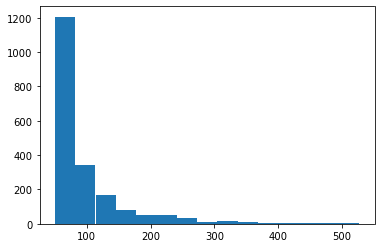

In [12]:
plt.hist(degrees, bins=15)
plt.show()

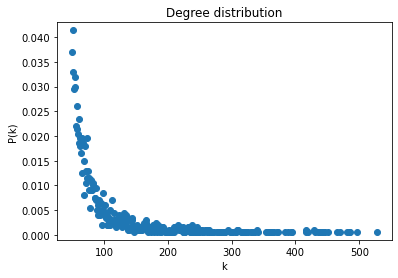

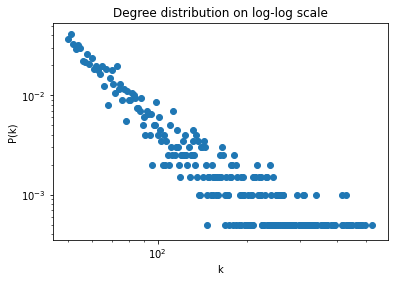

In [13]:
deg_dict = dict(Counter(degrees))
deg_freq =  np.array(list(deg_dict.values()))
degree_distribution = deg_freq / deg_freq.sum()
plt.scatter(deg_dict.keys(), degree_distribution)
plt.ylim(-0.001, 0.043)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Degree distribution')
plt.show()

plt.scatter(deg_dict.keys(), degree_distribution)
plt.ylim(0.7*degree_distribution.min(), 1.3*degree_distribution.max())
plt.xscale('log')
plt.yscale('log')
plt.title('Degree distribution on log-log scale')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show()

# __Exercise 1a__

Check the statement of the following theorem:

__Theorem__

The Barabási-Albert model is scale-free, i.e. the degree distribution resulting from the BA model is a power-law of the form
$$P(k)\sim k^{-3}$$

i.e. fit a power-law curve to the degree distribution of the graph, generated in the solution for __Exercise 2__ .


__Task and hints:__
1. Use the given ```test_pow_law``` and the ```curve_fit``` function. 
    * The $x$ and $y$ variables in the ```curve_fit``` function should be the $x$ and $y$ variables plotted in the previous exercise, i.e. the degrees ($k$) and the degree distribution $P(k)$ <br> Is the fitted exponent (parameter b) close to the theoretical value ($\gamma = -3$)? 
2. Plot the degree distribution on a scatter plot (as in the previous exercice), and also plot the fitted power-law curve on the this figure.
    * Set the color of the fitted curve to red (```c='r'```), and its linestyle to dashed (```lw='--'```)

__This should take you about 10-12 minutes!__

In [14]:
def test_pow_law(x, a, b, c):
    return a*x**(-b) + c

# __Exercise 2b__ 

Since power-law looks linear on log-log scale, unfortunatelly, in practice the exponent is often estimated via linear regression on the logarithm of the degree distribution and the logarithm of the degrees, but this method produces inaccurate estimates. 

__Task__

Repeat __Exercise 3a__, but now fit a line to the logarithm of the data (i.e. set $x = \log k$, and $y=\log P(k)$):

1. Calculate the logarithm of the degree distribution and the corresponding degrees, and save them in numpy arrays.
2. Similarly to __Ex 3b__ use the ```test_lin``` function to fit a line to the logarithic data. <br>  Is the fitted exponent (parameter a) close to the theoretical value 
3. Plot the fitted line and the logarithmic data on a figure. 

__This should take you about 5 minutes!__

In [20]:
def test_lin(x, a, b):
    return a*x + b

__Note__ that there are more sophisticated methods to fit power-law distribution as described [here](https://arxiv.org/abs/0706.1062) and [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5330461/). There is a [python module](https://github.com/jeffalstott/powerlaw), called [powerlaw](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777), to determine if a probability distribution fits a power-law.  

# __Exercise 3__ 

__Definition__ (small-world property)

A network is said to be small-world, if the "typical" distance $L$ (i.e. the average length of shortest paths) between any two nodes grows proportionally to the logarithm of the size of the network i.e. $L \sim \log |V|$, where $V$ is the set of nodes. 

__Note__ that scale-free networks are ultra-small worlds, i.e. due to hubs, the shortest paths become significantly smaller and scale as $L \sim \log \log |V|$

__Theorem__

The average path length of the BA model increases approximately logarithmically with the size of the network, i.e. the average shortest path length of a BA(n, m) network is of order $\log n$. Moreover if $m>1$ the BA is ultra-small world. The actual form of $L$ has a double logarithmic correction and goes as
$$L\sim {\frac{\log n}{\log \log n}}$$

Investigate how the average shortest path length grows with the number of nodes $n$, for $m = 1, 2,$ and $9$!
1. Let ```network_sizes = range(10, 410, 10)```. 
2. Create three lists of average path lengths corresponding to the three values of m, i.e. <br> For m = 1, 2, 9:
    * Calculate the average shortest path length of BA(n, m) networks ```for n in network_sizes``` and save it in a list variable. 
3. On a single figure plot the following:
    1. The average shortests path lengths (y-axis) against the network sizes (x-axsis), i.e. the previously calculated three lists.
        * Set the labels as ```label='m=1'```, ```label='m=2'```, and ```label='m=9'``` correspondingly. 
    2. Plot the following curve:
        * $f(x)= \log(x)$, set its color to red, and its label to ```'log(n)'``` <br> __Hint__: Let x be ```np.linspace(10, 400, 400)```, then you can calculate $f(x)$ as ```np.log(x)``` 
        
        
4. Set the label of the x-axis to 'Number of nodes', and the label of the y-axis to 'Average shortest path length', and set the size of the figure to (10,8) (you can do it by typing ```plt.figure(figsize=(10,8))``` in the first line.

__This should take you about 15 minutes!__

---

---

---

# __Centrality measures__ 

In [29]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import operator
from scipy.spatial import distance

In [30]:
import pydot 

# Centrality measures 

In graph theory and network analysis, centrality measures identify the most important and influential nodes within a graph. 

Applications include identifying
* the most influential person(s) in a social network, 
* key infrastructure nodes in the Internet or urban networks, 
* super-spreaders of disease or information. 

There are several ways to characterize the importance of a vertex. Generally, centrality measures are real-valued functions on the vertices of a graph, where the values produced are expected to provide a ranking which identifies the most important nodes. The larger the centrality measure is, the more central/important a node is.  

Today we will cover the most frequently used centrality measures. Historically first and conceptually simplest is the degree centrality:

__Definition__ (Degree centrality)

The degree centrality for a node $v$ is the fraction of nodes it is connected to, i.e.
$$C_{\mathrm{deg}}(v) = \frac{\mathrm{deg}(v)}{n-1} $$

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph $n-1$, where $n$ is the number of nodes in the graph.

# __Exercise 4__

Goal is to draw a graph and color its nodes according to their centrality.

1. Calculate (and save in a variable) the degree centralities of the nodes of [Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) graph: [nx.karate_club_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html?highlight=karate_club#networkx.generators.social.karate_club_graph). You can simply calculate the degree centralities of a graph with the [nx.degree_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality) function, which returns a dictionary where the keys are the nodes and the values are the corresponding centralities.
2. Draw the graph and color the nodes by their degree centrality:
    1. Calculate the positions of the nodes and save it in a variable: use ```nx.drawing.nx_pydot.graphviz_layout``` if pydot is installed on your computer. Otherwise, you can use ```nx.spring_layout```
    2. Draw the graph with ```nx.draw```, and color the nodes by the degree centrality: set the ```node_color``` parameter of ```nx.draw``` to be a list containing the degree centralities of the nodes.
    3. You can change the colors of the nodes by setting the ```cmap``` parameter of ```nx.draw``` to another [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). Try another colormaps e.g.  ```plt.cm.YlOrRd```,```plt.cm.plasma```, ```plt.cm.inferno```,```plt.cm.RdYlBu_r```, ```plt.cm.RdYlBu_r```, ```plt.cm.coolwarm```, ```plt.cm.Spectral```.

__This should take you about 10-12 minutes!__

# __Exercise 5a__ 

Write a function, called ```node_with_highest_centrality```, which has one input: ```centralities_dict``` dictionary of centralities (keys: nodes, values: centralities). 

The function should return the name of the node with the highest centrality measure.

Hint:
* The ```.items()``` function of dictionaries returns its keys and values in an array of tuples.
* You should use the built-in [max](https://www.programiz.com/python-programming/methods/built-in/max) function with a well-chosen ```key``` function, because by default ```max(centralities_dict)``` would return the maximum of the keys, and ```max(centralities.values())``` would return the largest key and its value in a tuple. The ```key``` function is an optional argument of the ```max``` function and this is where the iterables are passed and comparison is performed based on its return value. To see how it works take a look at Example 3 [here](https://www.programiz.com/python-programming/methods/built-in/max).
* Hint for the key function: you can use a [lambda function](https://www.w3schools.com/python/python_lambda.asp) or you can use [operator.itemgetter](https://docs.python.org/3/library/operator.html#operator.itemgetter). Maybe [this page](https://stackoverflow.com/questions/18595686/how-does-operator-itemgetter-and-sort-work-in-python) and [this one](https://stackoverflow.com/questions/8459231/sort-tuples-based-on-second-parameter) are also useful.

__This should take you about 10-12 minutes!__

In [35]:
centralities = nx.degree_centrality(nx.barabasi_albert_graph(8,1))

In [36]:
centralities

{0: 0.14285714285714285,
 1: 0.8571428571428571,
 2: 0.14285714285714285,
 3: 0.2857142857142857,
 4: 0.14285714285714285,
 5: 0.14285714285714285,
 6: 0.14285714285714285,
 7: 0.14285714285714285}

The max function returns the largest key of a dictionary

In [37]:
max(centralities)

7

The max function applied to the items of a dictionary returns the largest key and its value in tuple

In [38]:
max(centralities.items())

(7, 0.14285714285714285)

The largest value is:

In [39]:
max(centralities.values())

0.8571428571428571

# __Exercise 5b__ 

Based on __Exercise 4__ complete the following function that has the following inputs: 
* ```G```: graph,
* ```centrality```: dictionary output of a centrality function of networkx, i.e. the keys are the nodes and the values are the centralities,
* ```name_of_centrality```: string - the name of the centrality measure,
* ```draw_labels```: optional parameter, by default it is False. 

The function should draw the given $G$ graph with ```nx.drawing.nx_pydot.graphviz_layout``` layout (or ```nx.spring_layout```) and the nodes should be colored by the given ```centrality``` dictionary. 

If ```draw_labels``` is True, then the names of the nodes should be drawn (use ```nx.draw_networkx_labels```) and also the name of the node with the highest centrality value should be printed out using the function of __Exercise 5a__. Moreover change the deafult colormap to your favorite one (e.g. ```plt.cm.YlOrRd```). The title of the plot should be the ```name_of_centrality```.

Test your fuction on the Karate club graph!

__This should take you about 10 minutes!__

In [16]:
def draw(G, centrality, name_of_centrality, draw_labels=False):
    plt.figure(figsize=(7,5))
    
    # Choose your favorite colormap
    color_map = 
    
    # Calculate the positions of the nodes
    pos = 
    
    # Draw the nodes, and color them by the centrality  measure
    # Hint: Exercise 1
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=color_map, 
                                   node_color=
                                  )
    
    # If draw_labels True, then draw the names of the nodes
    if draw_labels:
        # draw the labels
        
        # print out the name of the node with the highest centrality
        
        
    # Draw the edges
    nx.draw_networkx_edges(G, pos)
    
    # Here's the colorbar
    plt.colorbar(nodes)
    
    # Add title to the graph:
    
    
    plt.axis('off')
    plt.show()

In [17]:
G = nx.karate_club_graph()

In [ ]:
draw(G, nx.degree_centrality(G), 'degree centrality')

In [ ]:
draw(G, nx.degree_centrality(G), 'degree centrality', draw_labels=True)

# Now we will compare a few centrality measures

__Definition__ (Degree centrality)

The degree centrality for a node $v$ is the fraction of nodes it is connected to, i.e.
$$C_{\mathrm{deg}}(v) = \frac{\mathrm{deg}(v)}{n-1} $$

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph $n-1$, where $n$ is the number of nodes in the graph.

__Definition__ (Closeness centrality)

In a connected graph, the closeness centrality (or closeness) of a node is the reciprocal of the average length of the shortest path between the node and all other $n-1$ nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

$$C_{\mathrm{close}}(v) = \frac{1}{\frac{1}{n-1}\sum_{u=1}^{n-1} d(u, v)} =  \frac{n-1}{\sum_{u=1}^{n-1} d(u, v)}, $$

where $d(u, v)$ is the shortest-path distance between $u$ and $v$, and $n$ is the number of nodes.

__Definition__ (Betweenness centrality)

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$.

$$C_{\mathrm{B}}(v) =\sum_{s\neq v \neq t \in V} \frac{\sigma_{s, t}(v)}{\sigma_{s, t}},$$

where $V$ is the set of nodes, $\sigma_{s, t}$ is total number of shortest paths from node $s$ to node $t$, and $\sigma_{s, t}(v)$ is the number of those paths that pass through $v$.

__Definition__ (Eigenvector centrality)

Eigenvector centrality is a measure of the influence of a node in a network. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

__Using the adjacency matrix to find eigenvector centrality__

For a given graph $G=(V,E)$ with $|V| = n$ number of vertices, let $A = (a_{i,j})$ be the adjacency matrix, i.e. $a_{i, j} = 1$ if vertex $i$ is linked to vertex $j$, and $a_{i, j} = 0$ otherwise. The eigenvector centrality of vertex $v$ can be defined as:

$$C_\mathrm{eigen}(v) =\frac{1}{\lambda} \sum_{u \in \mathrm{Ne}(v)}C_\mathrm{eigen}(u)=\frac{1}{\lambda} \sum_{u \in G}a_{v,u} \cdot C_\mathrm{eigen}(u)$$
where $\mathrm{Ne}(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant. Let $\mathbf{x} = (x_1, \ldots, x_n) = (C_\mathrm{eigen}(v_1), \ldots, C_\mathrm{eigen}(v_n))$. With a small rearrangement this can be rewritten in vector notation as the eigenvector equation
$$\mathbf{Ax} = \lambda\mathbf{x}$$

Since the entries in the adjacency matrix are non-negative, there is a unique largest eigenvalue, which is real and positive, by the Perron–Frobenius theorem. This greatest eigenvalue results in the desired eigenvector centrality measure. The $i^{th}$ component of the related eigenvector gives the eigenvector centrality of vertex $i$ in the network.

# __Exercise 6a__ 

Let's calculate the centralities of the following graph

In [48]:
edge_list = [('a', 'b'), ('a', 'd'), ('a', 'f'), ('b', 'd'), ('b', 'e'), ('b', 'g'), ('c', 'd'), ('c', 'h'),
             ('d', 'e'), ('d', 'f'), ('d', 'g'), ('e', 'g'), ('f', 'g'), ('f', 'h'), ('g', 'h'), ('h', 'r'),
             ('h', 'i'), ('i', 'p'), ('i', 'j'), ('i', 'n'), ('j', 'p'), ('j', 'n'), ('j', 'o'), ('j', 'k'),
             ('j', 'l'), ('j', 'm'), ('k', 'p'), ('k', 'l'), ('l', 'm'), ('m', 'q'), ('n', 'o'), ('q', 's')]

In [49]:
example_graph = nx.Graph()
example_graph.add_edges_from(edge_list)

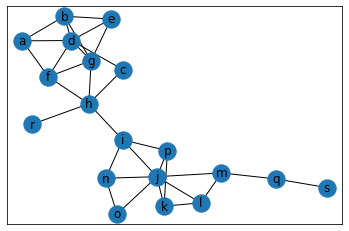

In [50]:
nx.draw_networkx(example_graph, nx.drawing.nx_pydot.graphviz_layout(example_graph))

1. Using the ```draw``` function of __Exercise 5b__ create four separate plots of the ```example_graph``` and color its nodes according to
    1. Degree centrality ([nx.degree_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)),
    2. Eigenvector centality ([nx.eigenvector_centrality_numpy](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality_numpy.html#networkx.algorithms.centrality.eigenvector_centrality_numpy)),
    3. Betweenness centrality ([nx.betweenness_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)),
    4. Closeness centrality ([nx.closeness_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)).
2. Set the ```draw_labels``` parameter of the ```draw``` function to ```True```. 

What can you observe? Which node is the most central/important?

__This should take you about 5 minutes!__

# __Exercise 6b__

Now let's calculate the centralities of the Florentine families graph

In [55]:
families_graph = nx.florentine_families_graph()

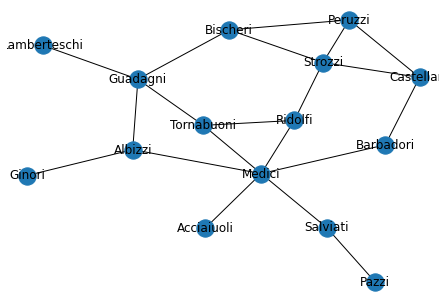

In [56]:
nx.draw(families_graph, nx.drawing.nx_pydot.graphviz_layout(families_graph), with_labels=True)

1. Similarly to __Exercise 6a__, using the ```draw``` function create four separate plots of the ```families_graph``` and color its nodes according to
    1. Degree centrality ([nx.degree_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality)),
    2. Eigenvector centality ([nx.eigenvector_centrality_numpy](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality_numpy.html#networkx.algorithms.centrality.eigenvector_centrality_numpy)),
    3. Betweenness centrality ([nx.betweenness_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)),
    4. Closeness centrality ([nx.closeness_centrality](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)).
2. Set the ```draw_labels``` parameter of the ```draw``` function to ```True```. 

What can you observe? Which node is the most central/important?

__This should take you about 5 minutes!__

# Random walk on graphs and stationary distribution

Random walk on graphs:
1. Given an undirected graph and a starting node $v$, select a neighbour of $v$ (uniformly) at random  
2. Move to the selected neighbour and repeat the same process (untill a termination condition is verified)
3. The random sequence of nodes selected in this way is a random walk on the graph

![random_walk_on_graph](https://i.stack.imgur.com/rISDS.gif)

__Simple random walk on graph__

Given an undirected graph $G = (V, E)$, with $n = |V|$ and
$m =|E|$, a simple random walk is a stochastic process that starts from a given vertex, and then visits one of its neighbors that is chosen uniformly at random.

The simple random walk on $G$ is defined by the following transition matrix $P = (p_{i j})$:


$$ p_{i j} = 
\begin{cases}
\frac{1}{\mathrm{deg}(i)},  \text{ if } j \text{ is a neighbour of } i, \text{ i.e. } (i, j) \in E \\
0, \text{ otherwise}
\end{cases}$$

where $\mathrm{deg}(u)$ is the degree of the node $u$.

The sequence of vertices $v_0, v_1, v_2, \ldots , v_k,\ldots$ selected in this way is a simple random walk on $G$.


At each step $k$, we have a random variable $X_k$ taking values on $V$.

Hence, the random sequence $X_0, X_1, X_2, \ldots, X_k , \ldots$ is a discrete time stochastic process defined on the state space $V$.

Notice that the transition probabilities do not depend on “time” $k$, hence

#### The random sequence of vertices visited by the walk, $X_0, X_1, \ldots , X_n, \ldots$ is a __Markov chain__ with state space __V__ and transition probability matrix $P = (p_{ij})_{i,j\in V}$ 

* Let $D$ be the diagonal matrix with $(D)_{i,i} = \mathrm{deg}(i)$, 
* Let $D^{-1}$ be the inverse matrix of $D$, i.e. $(D^{-1})_{i,i} = \frac{1}{\mathrm{deg}(i)}$, 
* and let $A$ be the adjacency matrix of $G$. 

Then $P = D^{-1} A$

Let $\pi_k$ be the row vector containing the probability distribution of $X_k$ , 


$$\pi_k(i) = \mathbb{P}(X_k = i), \quad i \in V$$


The rule of the walk is expressed by the simple equation

### $$\pi_{k+1} = \pi_k P$$ 

__Stationary distribution__

A stationary distribution of a Markov chain with transition matrix $P$ is a probability distribution $\pi$, such that $\pi = \pi P$

A Markov chain has a unique stationary distribution if
1. it is irreducible 
    * the underlying graph is strongly connected
2. it is aperiodic
    * for random walks, the greatest common divisor of the length of the cycles in the underlying graph is one e.g . if the graph is bipartite it is not aperiodic

__Theorem__
Given an irreducible and aperiodic graph with a set of nodes $V$ and a set $E$ of edges, as $k \to \infty$ the fraction of time when the random walker visited node $v$ converges to the stationary distribution, which is proportional to the degree of $v$:

$$\pi(v) = \frac{\mathrm{deg}(v)}{2|E|} $$

So if the graph is connected and aperiodic the $\pi_k$ sequence defined by $\pi_{k} = \pi_{k-1} P$ concerges to a stationary distribution $\pi$

# __Exercise 7a__

Write a function that that has two inputs: 
* a graph $G = (V, E)$,
* and the number of iterations $k$. By default let $k$ be 150.

The function should return a list containing the L-1 distance of the vector $\pi_j$ and $\pi$ for $j=0,1,\ldots,k$.

Help:

0. If the graph is bipartite then it should print out that 'The graph is bipartite'. Use [nx.is_bipartite](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.basic.is_bipartite.html#networkx.algorithms.bipartite.basic.is_bipartite)
1. First get the adjacency matrix of $G$ ([nx.to_numpy_array](https://networkx.github.io/documentation/latest/reference/generated/networkx.convert_matrix.to_numpy_array.html) or [nx.to_numpy_matrix](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.convert_matrix.to_numpy_matrix.html))
2. Calculate the $D^{-1}$ matrix. Use [np.diag](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html).
3. Calculate the transition probability matrix $P = D^{-1} A$. Use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) for matrix multiplication.
4. Initialize $\pi_0$ as a numpy array of length $n = |V|$ which is zero except the first coordinate, i.e. $\pi_0 = (1,0,0, \ldots, 0)$. Use the [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function. 
5. Calculate $\pi$. Recall that $\pi(v) = \frac{\mathrm{deg}(v)}{2\cdot|E|} $.
6. Initialize an empty list, called ```dist```, that will contain the L-1 distances between $\pi_j$ and $\pi$ for $j=1,\ldots,k$
7. For $j$ in ```range(k)```:
    1. calculate the L1 distance between $\pi_j$ and $\pi$ and append it to the ```dist``` list. Use [distance.minkowski](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html) with correct parameter settings to calculate the L-1 distance.
    2. Calculate $\pi_{j+1}$. Recall that $\pi_{j+1} = \pi_j \cdot P$. Again use the [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) function.
8. Return the ```dist``` list

__This should take you about 15-18 minutes!__

# __Exercise 7b__ 

1. Create a 4-regular random graph on 225 nodes. Use [nx.random_regular_graph](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html),
2. Plot the output of the function of __Exercise 7a__ applied on this 4-regular graph, and set the label to be '4-regular',
3. Create a periodic grid graph of $15 \times 15$ nodes. Use [nx.grid_2d_graph(15, 15, periodic=True)],
4. Plot the output of the function of __Exercise 7a__ applied on this grid graph, and set the label to be 'grid',
5. Show the labels with ```plt.legend()```